# RFM Customer Segmentation

### **RFM** is a customer segmentation algorithm which segments the customers based on only three points

- **Recency** - How recently did the customer purchased something?
- **Frequency** - How frequently does the customer purchase something?
- **Monetary** - How much has the customer spent?

#### This helps businesses to properly segment their customers into various groups and launch different programs and campains on the basis of the segmentation

# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"C:\Users\Nishs\OneDrive\Desktop\RFM Customer Segmentation Project\online_retail_II.csv") # reading the dataset

In [ ]:
df.head() # checking the first 5 rows

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# Data Preprocessing

- Duplicate Records
- Missing Values
- Inconsistent Format

In [ ]:
df.info() # checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


# Removing Duplicates

In [ ]:
df.duplicated().sum() # checking for duplicates
df.drop_duplicates(inplace=True) # removing duplicates
df.duplicated().sum() # checking for duplicates

np.int64(0)

# Formatting Dataset

In [7]:
df['Customer ID'] = df['Customer ID'].astype('str') # converting to string

In [ ]:
df.describe() # describing

,Quantity,Price
count,1.033036e+06,1.033036e+06
mean,1.007688e+01,4.613980e+00
std,1.751976e+02,1.223975e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


#### Checking total number of products, transactions and customers

In [9]:
print("Total Number of Transactions: ", len(df['Invoice'].value_counts())) # total number of transactions
print("Total Number of Customers: ", len(df['Customer ID'].value_counts())) # total number of customers
print("Total Number of Products: ", len(df['StockCode'].value_counts())) # total number of products

Total Number of Transactions:  53628
Total Number of Customers:  5943
Total Number of Products:  5305


# Checking for Missing Values

In [10]:
Missed_Val = df['Invoice'].astype(str).str.contains('c') # checking for missing values
Missed_Val.fillna(0, inplace=True) # filling with 0
Missed_Val = Missed_Val.astype(int) # converting to integer
Missed_Val.value_counts() # counting

Invoice
0    1033036
Name: count, dtype: int64

In [ ]:
df.info() # checking for missing values

<class 'pandas.core.frame.DataFrame'>
Index: 1033036 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1033036 non-null  object 
 1   StockCode    1033036 non-null  object 
 2   Description  1028761 non-null  object 
 3   Quantity     1033036 non-null  int64  
 4   InvoiceDate  1033036 non-null  object 
 5   Price        1033036 non-null  float64
 6   Customer ID  1033036 non-null  object 
 7   Country      1033036 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 70.9+ MB


In [12]:
df = df[df['Customer ID'].notna()] # removing missing values

In [13]:
print("Total number of transactions with negative quantity: ", df[df['Quantity'] <= 0]['Quantity'].count()) # checking for negative quantity
print("Total number of transactions with negative price: ", df[df['Price'] <= 0]['Price'].count()) # checking for negative price

Total number of transactions with negative quantity:  22496
Total number of transactions with negative price:  6019


In [14]:
df = df[(df['Price']>0) & (df['Quantity']>0)] # removing negative quantity and price

# Create RFM Table

In [15]:
print("start date: ", df['InvoiceDate'].min()) # start date
print("end date: ", df['InvoiceDate'].max()) # end date

start date:  2009-12-01 07:45:00
end date:  2011-12-09 12:50:00


In [16]:
from datetime import datetime
df['Revenue'] = df['Price'] * df['Quantity'] # creating revenue column
df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate']) # converting to datetime
df["InvoiceDate"] = df["InvoiceDate"].dt.date # converting to date

In [17]:
import datetime as dt
our_date = max(df.InvoiceDate) + dt.timedelta(days=1) # creating our date
print(our_date)

2011-12-10


In [18]:
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda x:(our_date - x.max()).days, 
                                     'Invoice': lambda x: len(x), 'Revenue': lambda x: x.sum()}).reset_index() # creating RFM table

rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns = {'InvoiceDate': 'Recency', 
                      'Invoice': 'Frequency', 
                      'Revenue': 'Monetary'}, inplace = True) # renaming columns
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,326,34,77556.46
1,12347.0,3,222,4921.53
2,12348.0,76,51,2019.40
3,12349.0,19,175,4428.69
4,12350.0,311,17,334.40


# RFM Metric and RFM Segments

In [ ]:
# Crearing RFM Score
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1]).astype(int) # recency
rfm['F'] = pd.qcut(rfm['Frequency'], 5, labels = [5, 4, 3, 2, 1]).astype(int) # frequency
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels = [5, 4, 3, 2, 1]).astype(int) # monetary
rfm.head()

,Customer ID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,34,77556.46,2,4,1
1,12347.0,3,222,4921.53,5,1,1
2,12348.0,76,51,2019.40,3,3,2
3,12349.0,19,175,4428.69,5,1,1
4,12350.0,311,17,334.40,2,4,4


In [20]:
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str) # creating RFM Segment
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1) # creating RFM Score
rfm.head()

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
0,12346.0,326,34,77556.46,2,4,1,241,7
1,12347.0,3,222,4921.53,5,1,1,511,7
2,12348.0,76,51,2019.40,3,3,2,332,8
3,12349.0,19,175,4428.69,5,1,1,511,7
4,12350.0,311,17,334.40,2,4,4,244,10


In [ ]:
# Creating Segments
def segment(score):
    if score>=10:
        return 'Top Customers'
    elif score>= 7:
        return 'Loyal Customers'
    elif score>=5:
        return 'Potential'
    else:
        return 'Lost'

rfm['Segment'] = rfm['RFM_Score'].apply(segment)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
0,12346.0,326,34,77556.46,2,4,1,241,7,Loyal Customers
1,12347.0,3,222,4921.53,5,1,1,511,7,Loyal Customers
2,12348.0,76,51,2019.40,3,3,2,332,8,Loyal Customers
3,12349.0,19,175,4428.69,5,1,1,511,7,Loyal Customers
4,12350.0,311,17,334.40,2,4,4,244,10,Top Customers


In [22]:
print("Total Number of Top Customers: ", rfm[rfm['RFM_Score']>=10].shape[0]) # total number of top customers
print("Total Number of Loyal Customers: ", rfm[rfm['RFM_Score']>=7].shape[0]) # total number of loyal customers
print("Total Number of Potential Customers: ", rfm[rfm['RFM_Score']>=5].shape[0]) # total number of potential customers
print("Total Number of Lost Customers: ", rfm[rfm['RFM_Score']<5].shape[0]) # total number of lost customers

Total Number of Top Customers:  2466
Total Number of Loyal Customers:  5073
Total Number of Potential Customers:  5808
Total Number of Lost Customers:  71


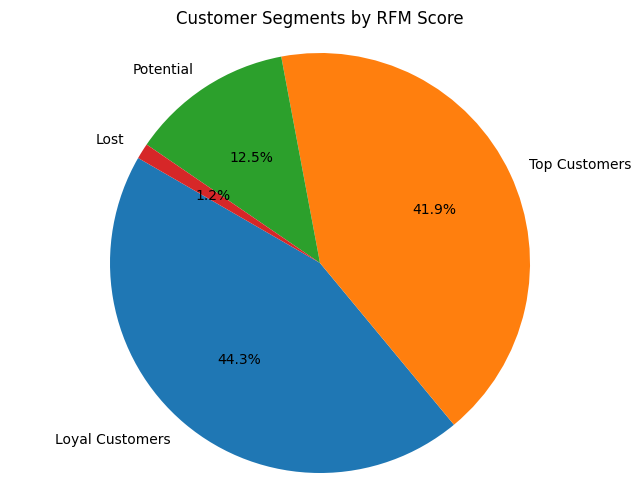

In [36]:
# Count the number of customers per segment
segment_counts = rfm['Segment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=150)
plt.title('Customer Segments by RFM Score')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# KMeans Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
rfm_clustering = rfm[['Recency','Frequency', 'Monetary']] # creating RFM Clustering
scaler = StandardScaler() # creating scaler
rfm_scaled = scaler.fit_transform(rfm_clustering) # scaling

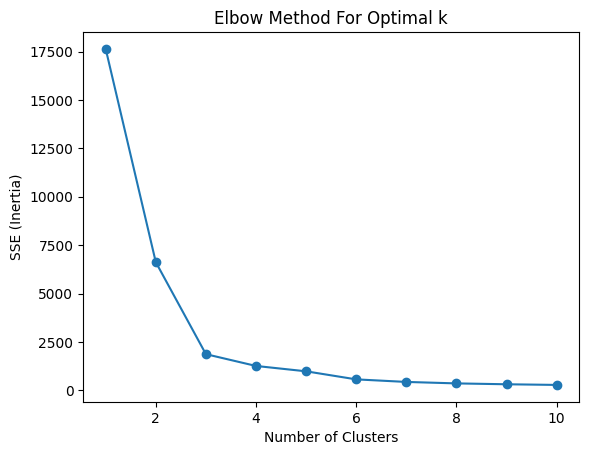

In [25]:
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state = 30) # creating KMeans
    kmeans.fit(rfm_scaled) # fitting
    sse.append(kmeans.inertia_) # finding inertia

plt.plot(range(1, 11), sse, marker='o') 
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4, random_state = 42) # creating KMeans
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled) # fitting

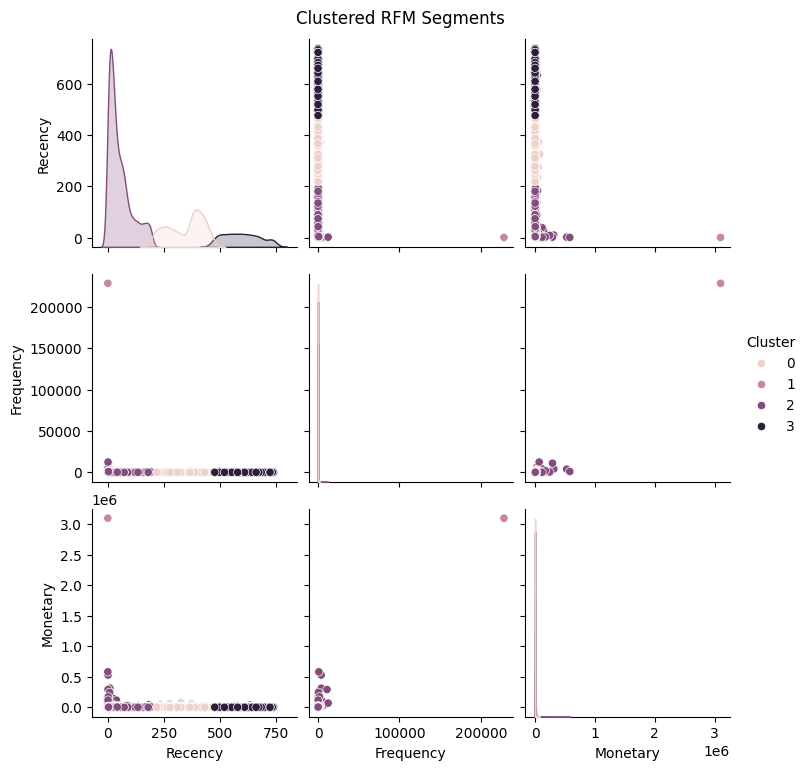

In [ ]:
import seaborn as sns

sns.pairplot(rfm, hue='Cluster', vars = ["Recency", "Frequency", "Monetary"]) # plotting RFM Segments
plt.suptitle("Clustered RFM Segments", y = 1.02) # adding title
plt.show()

# Conclusion

#### **We have a significant number of Loyal Customers who could be converted into Top Customers by promoting high-value or exclusive products. For Lost Customers, strong return offers or win-back campaigns with deep discounts might help re-engage them. Potential Customers show promise and can be nurtured with consistent marketing and moderate promotional offers to increase their engagement.**